custom: pca__percent_variance=0.95
default: pca__n_components=13
custom: kmeans__n_clusters=5
**************************************************
Transformation Streamline: pca--> normalize--> kmeans
**************************************************
Percent of Variance Explained By Components:

[8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04 4.19044539e-04 2.48538539e-04
 8.53912023e-05 3.08071548e-05 6.65623182e-06 1.56778461e-06
 7.96814208e-08] 

95.0 % variance is explained in the first  2  components



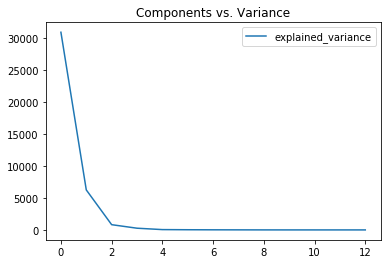

Transformed Boston Dataset ... 
         PC_0      PC_1  cluster
0   -0.998925 -0.046354        0
1   -0.998211  0.059791        0
2   -0.996560  0.082877        0
3   -0.995404  0.095770        0
4   -0.996435  0.084365        0
5   -0.995123  0.098639        0
6   -0.996513 -0.083433        0
7   -0.995135 -0.098525        0
8   -0.999997 -0.002516        0
9   -0.999995 -0.003176        0
10  -0.998295 -0.058365        0
11  -0.995289 -0.096957        0
12  -0.999387 -0.035019        0
13  -0.996706 -0.081100        0
14  -0.997499  0.070675        0
15  -0.997576 -0.069582        0
16  -0.999960  0.008907        0
17  -0.999970  0.007764        0
18  -0.641490  0.767131        0
19  -0.999555 -0.029813        0
20  -0.994458  0.105130        0
21  -0.998965 -0.045484        0
22  -0.996448 -0.084207        0
23  -0.997932 -0.064278        0
24  -0.998080 -0.061943        0
25  -0.700686  0.713470        0
26  -0.994853  0.101324        0
27  -0.715968  0.698133        0
28  -0.9999

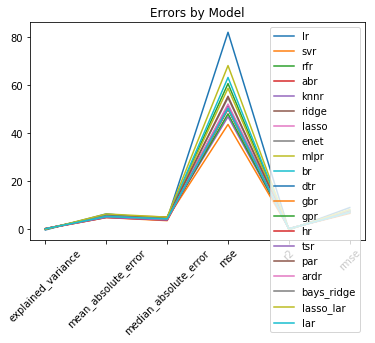

*****************************************
=> (Regressor) => Performance Sheet
*****************************************
                              lr        svr         rfr        abr       knnr  \
explained_variance      0.212485   0.217704   -0.138405   0.180297   0.093142   
mean_absolute_error     6.251436   5.815381    7.043936   6.338894   6.420317   
median_absolute_error   4.887462   4.008758    4.863500   4.974935   4.735000   
mse                    71.659997  76.088456  100.364057  72.309837  78.755864   
r2                      0.164586   0.140242   -0.239791   0.068949   0.039204   
rmse                    8.353185   8.531464    9.938748   8.461918   8.802729   

                           ridge      lasso       enet       mlpr          br  \
explained_variance      0.212657   0.198829   0.165510   0.172166   -0.212963   
mean_absolute_error     6.249653   6.221788   6.295125   6.449099    7.277161   
median_absolute_error   4.883844   4.561673   4.579574   4.238656    

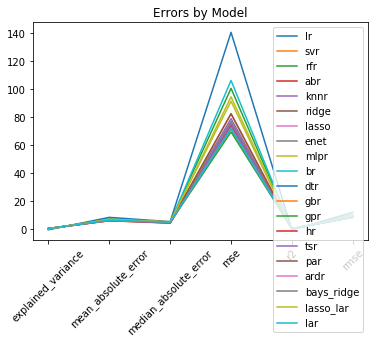

*****************************************************************************************
=> (Regressor) => (Two Tailed T-test) =>(Calculating Statistical Differences In Means)
*****************************************************************************************
Model Competition Results...
avg_kfold
{'lr': explained_variance        0.212485
mean_absolute_error       6.251436
median_absolute_error     4.887462
mse                      71.659997
r2                        0.164586
rmse                      8.353185
dtype: float64, 'svr': explained_variance        0.217704
mean_absolute_error       5.815381
median_absolute_error     4.008758
mse                      76.088456
r2                        0.140242
rmse                      8.531464
dtype: float64, 'rfr': explained_variance        -0.138405
mean_absolute_error        7.043936
median_absolute_error      4.863500
mse                      100.364057
r2                        -0.239791
rmse                       9.938748
dtype

In [5]:
import pandas as pd
from streamml2.streamml2.streamline.transformation.flow.TransformationStream import TransformationStream
from streamml2.streamml2.streamline.feature_selection.flow.FeatureSelectionStream import FeatureSelectionStream
from streamml2.streamml2.streamline.model_selection.flow.ModelSelectionStream import ModelSelectionStream
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load data
boston=load_boston()
X=pd.DataFrame(boston['data'], columns=boston['feature_names'])
y=pd.DataFrame(boston['target'],columns=["target"])


# Transform data
X2 = TransformationStream(X).flow(["pca","normalize","kmeans"],

                  params={"pca__percent_variance":0.95,

                      "kmeans__n_clusters":len(set('target'))})

print("Transformed Boston Dataset ... ")
print(X2)

return_dict = FeatureSelectionStream(X2,y).flow(["mixed_selection", "abr", "rfr","svr","plsr"],
                                                params={},
                                                regressors=True,
                                                ensemble=True,
                                                featurePercentage=0.50,
                                                n_jobs=3)

print("Top 50% Critical Features ...")
print(return_dict['kept_features'])
Xsignal=X2[return_dict['kept_features']]
print(Xsignal)


regression_options={"lr" : 0,
           "svr" : 0,
           "rfr":0,
           "abr":0,
           "knnr":0,
           "ridge":0,
           "lasso":0,
           "enet":0,
           "mlpr":0,
           "br":0,
           "dtr":0,
           "gbr":0,
           "gpr":0,
           "hr":0,
           "tsr":0,
           "par":0,
           "ard":0,
           "bays_ridge":0,
           "lasso_lar":0,
           "lar":0}
results_dict = ModelSelectionStream(Xsignal,y).flow(list(regression_options.keys()),
                                                    params={},
                                                    metrics=[],
                                                    test_size=0.25,
                                                    nfolds=10,
                                                    nrepeats=10,
                                                    regressors=True,
                                                    stratified=False, 
                                                    #cut=y['target'].mean(),
                                                    modelSelection=True,
                                                    n_jobs=3)
print("Model Competition Results...")
for k in results_dict.keys():
    print(k)
    print(results_dict[k])

In [12]:
pd.DataFrame(results_dict['avg_kfold'])

,lr,svr,rfr,abr,knnr,ridge,lasso,enet,mlpr,br,dtr,gbr,gpr,hr,tsr,par,ardr,bays_ridge,lasso_lar,lar
explained_variance,0.212485,0.217704,-0.138405,0.180297,0.093142,0.212657,0.198829,0.165510,0.172166,-0.212963,-0.634868,0.063779,0.220876,0.215718,0.201348,0.187826,0.209960,0.213025,-4.440892e-17,0.212485
mean_absolute_error,6.251436,5.815381,7.043936,6.338894,6.420317,6.249653,6.221788,6.295125,6.449099,7.277161,8.225640,6.377812,6.112885,5.855301,5.908566,6.324948,6.244895,6.244412,6.903515e+00,6.251436
median_absolute_error,4.887462,4.008758,4.863500,4.974935,4.735000,4.883844,4.561673,4.579574,4.238656,4.523500,5.180000,4.264366,4.554607,4.292143,4.284914,4.734644,4.880164,4.874607,5.163163e+00,4.887462
mse,71.659997,76.088456,100.364057,72.309837,78.755864,71.655775,73.468284,76.740511,94.310626,105.977221,140.393526,82.362313,69.265811,74.101967,75.000458,82.202387,71.877441,71.659836,9.113666e+01,71.659997
r2,0.164586,0.140242,-0.239791,0.068949,0.039204,0.164783,0.150520,0.110788,-0.066010,-0.317102,-0.778641,-0.005974,0.154513,0.159498,0.149752,0.086975,0.163546,0.165229,-7.286994e-02,0.164586
rmse,8.353185,8.531464,9.938748,8.461918,8.802729,8.352720,8.448876,8.642920,9.469726,10.224912,11.802533,9.005289,8.237607,8.428754,8.479658,8.839581,8.362857,8.352218,9.445975e+00,8.353185


In [19]:
import numpy as np
np.argmin(pd.DataFrame(results_dict['avg_kfold']).as_matrix())

90